In [2]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [3]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [4]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

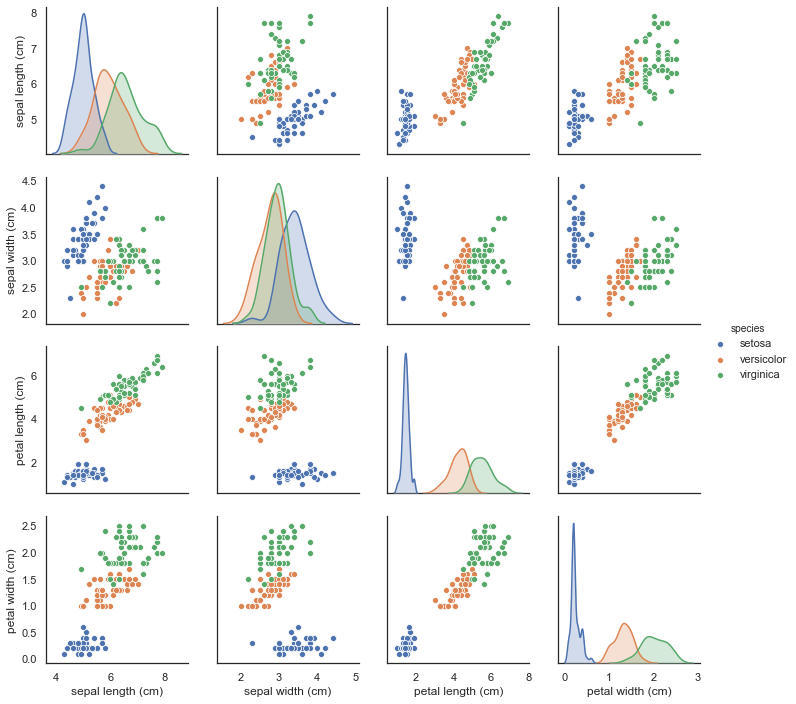

In [4]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Series(iris.target).map(dict(zip(range(3),iris.target_names)))
sns.pairplot(iris_df, hue='species');

In [5]:
#opening database and visualization
crops=pd.read_csv('./data/Production_Crops_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')
crops.head(5)

grouped_yield_for_pca=(crops.query('`Element Code` == 5419')
        .query('`Year Code` == 2016')
        .query('`Item Code` >1000')
        .pivot(index='Area',columns='Item',values='Value')
        .fillna(value=0)
        .reset_index()
          )
grouped_yield_for_pca.head()

Item,Area,Cereals (Rice Milled Eqv),"Cereals,Total","Citrus Fruit,Total","Coarse Grain, Total",Fruit Primary,"Pulses,Total","Roots and Tubers,Total","Treenuts,Total",Vegetables Primary
0,Afghanistan,19391.0,19816.0,83127.0,16667.0,88201.0,7406.0,119868.0,15984.0,91869.0
1,Africa,14245.0,15261.0,108260.0,13007.0,88514.0,7629.0,85875.0,5437.0,83707.0
2,Albania,47164.0,47164.0,271093.0,54585.0,225650.0,13178.0,245894.0,48487.0,272656.0
3,Algeria,10204.0,10204.0,181242.0,7647.0,105776.0,9978.0,304431.0,13223.0,219122.0
4,American Samoa,0.0,0.0,0.0,0.0,41581.0,0.0,38299.0,0.0,37544.0


In [ ]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Series(iris.target).map(dict(zip(range(3),iris.target_names)))
sns.pairplot(iris_df, hue='species');

In [29]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
yield_data = grouped_yield_for_pca.drop('Area',axis=1).values

In [26]:
import umap

In [27]:
reducer = umap.UMAP()

In [28]:
embedding = reducer.fit_transform(yield_data)
embedding.shape

(245, 2)

In [56]:
def ferti_class(x): #associate a color to each bin of fertilizer
    if x<50 :
        return 0
    elif 50<=x<150:
        return 1
    else:
        return 2

In [79]:
def ferti_class2(x): #associate a color to each bin of fertilizer
    if x<50 :
        return 'low'
    elif 50<=x<150:
        return 'medium'
    else:
        return 'high'

In [57]:
fertilizer_area=pd.read_csv('./data/Environment_Fertilizers_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')
fertilizer_area.head(1)

fertilizer_area_2016=(fertilizer_area.query('`Item Code` == (3102)')
    .query('`Year Code` == 2016')
    .query('`Area Code` <300')
    .sort_values('Value', ascending=False)
)

In [80]:
embedding2=pd.DataFrame(embedding)
embedding2=pd.merge(embedding2,grouped_yield_for_pca['Area'], left_index=True, right_index=True)
embedding2=pd.merge(embedding2,fertilizer_area_2016.loc[:,['Area','Value']],left_on='Area',right_on='Area')
embedding2['ferti_class']=embedding2.Value.apply(ferti_class)
embedding2['ferti_class2']=embedding2.Value.apply(ferti_class2)
embedding2.head()

,0,1,Area,Value,ferti_class,ferti_class2
0,3.323002,3.450130,Afghanistan,11.71,0,low
1,0.587541,8.886992,Albania,60.98,1,medium
2,0.317384,7.979850,Algeria,11.53,0,low
3,2.866147,4.690206,Angola,4.89,0,low
4,3.652767,1.336073,Antigua and Barbuda,8.76,0,low


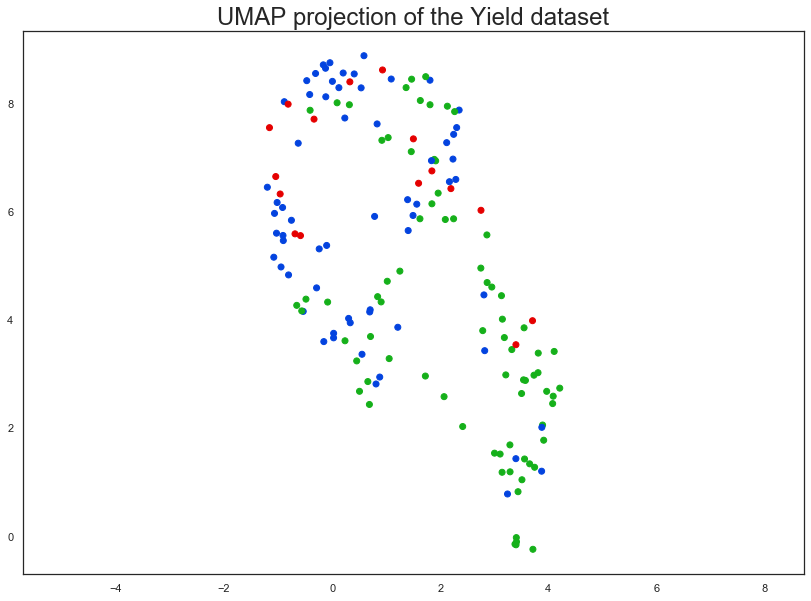

In [83]:
plt.scatter(embedding2[0], embedding2[1], c=[sns.xkcd_palette(colors)[x] for x in embedding2.ferti_class.values])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Yield dataset', fontsize=24);

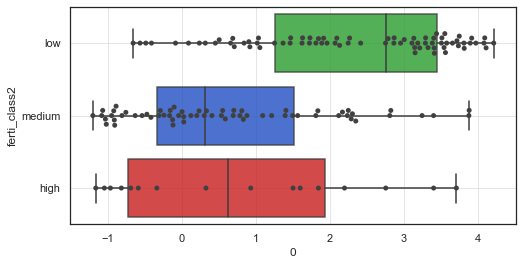

In [81]:
fig = plt.figure(figsize = (8,4))
#sns.palplot(sns.cubehelix_palette(3))
colors = ["green", "blue", "red"]
ax = sns.boxplot(x=embedding2[0], y='ferti_class2', data=embedding2, palette=sns.xkcd_palette(colors), boxprops=dict(alpha=.8))
ax = sns.swarmplot(x=embedding2[0], y='ferti_class2', data=embedding2, color=".25")
ax.grid(alpha=0.5)

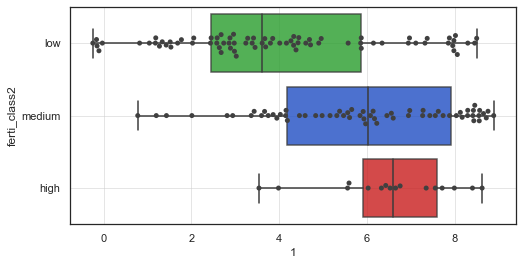

In [82]:
fig = plt.figure(figsize = (8,4))
#sns.palplot(sns.cubehelix_palette(3))
colors = ["green", "blue", "red"]
ax = sns.boxplot(x=embedding2[1], y='ferti_class2', data=embedding2, palette=sns.xkcd_palette(colors), boxprops=dict(alpha=.8))
ax = sns.swarmplot(x=embedding2[1], y='ferti_class2', data=embedding2, color=".25")
ax.grid(alpha=0.5)